<a href="https://colab.research.google.com/github/SREERAM-R2005/NIGHT_VISION_SELF/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch, torch.nn as nn

from torch.utils.data import DataLoader                    #imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from torchvision import datasets, transforms                  # This lets us easily download the Fashion MNIST dataset

# This ensures that our results are predictable
torch.manual_seed(0)     #setting the seed to 0 to get fixed random sequence
np.random.seed(0)

In [ ]:
n_epochs = 100
input_dim = 32               # found the dimensions from the dataset using print(data.shape)
output_classes = 10          # Checked for distinct labels in dataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  #setting torch device

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),                                   # Convert PIL Image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the tensor
])

train_dataset = datasets.CIFAR10(root='./data', train=True,                       # To download the CIFAR-10 dataset
                                             download=True, transform=transform)

test_dataset = datasets.CIFAR10(root='./data', train=False,                       # Load CIFAR-10 test dataset
                                             download=True, transform=transform)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64,          # Define data loaders to load data in batches
                                             shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64,
                                             shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:04<00:00, 39309381.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


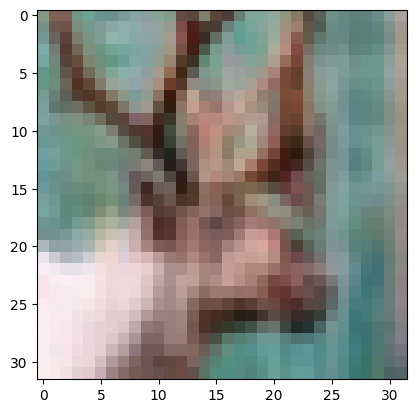

Label: 4


In [ ]:
import matplotlib.pyplot as plt


def imshow(img):                             # Define a function to display an image
    img = img / 2 + 0.5                      # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a random image from the dataset
idx = 41451
image, label = train_dataset[idx]

# Display the image
imshow(image)
print('Label:', label)


In [ ]:
class VGG19(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.convolutions = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fully_connected = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=512, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.7),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.7),
            nn.Linear(in_features=4096, out_features=1000),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.7),
            nn.Linear(in_features=1000, out_features=10),
            nn.Softmax(dim=1)
        )

    def forward(self, inputs):
        x = self.convolutions(inputs)         #  Forward passing the inputs
        x = self.fully_connected(x)
        return x

vgg19 = VGG19()                                      # creating a model after defining the architecture

cnn_optimizer = torch.optim.Adam(vgg19.parameters())  # using adam as our optimizer

loss_fn = nn.CrossEntropyLoss()                      # defining loss function as cross entropy loss


In [ ]:
class Lenet5(nn.Module):
     def __init__(self):
         nn.Module.__init__(self)
         self.convolutions = nn.Sequential(
             nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),  # 32, 32, 3 --> 28,28,6
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),  # 28,28,6 --> 14,14,6
             nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 14,14,6 --> 10,10,16
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),  # 10,10,16 --> 5,5,16
         )

         self.fully_connected = nn.Sequential(
             nn.Flatten(),
             nn.Linear(in_features=5 * 5 * 16, out_features=120),
             nn.ReLU(inplace=True),
             nn.Linear(in_features=120, out_features=84),
             nn.ReLU(inplace=True),
             nn.Linear(in_features=84, out_features=10),
             nn.Softmax(dim=1),
         )

     def forward(self, inputs):
         x = self.convolutions(inputs)
         x = self.fully_connected(x)
         return x


class AlexNet(nn.Module):
     def __init__(self):
         nn.Module.__init__(self)
         self.convolutions = nn.Sequential(
             nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11,stride=4), # 227, 227, 3 --> 55, 55, 96
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=3, stride=2), # 55, 55, 96 --> 27,27, 96

             nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2), # 27, 27, 96 --> 27, 27, 256
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=3, stride=2), # 27, 27, 256 --> 13,13, 256

             nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1), # 13, 13, 256 --> 13, 13, 384
             nn.ReLU(inplace=True),

             nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3,stride=1, padding=1), # 13, 13, 384 --> 13, 13, 256
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=3, stride=2), # 13, 13, 256 --> 6, 6,256
         )
         self.fully_connected = nn.Sequential(
             nn.Flatten(),
             nn.Dropout(p=0.2),
             nn.Linear(in_features=6 * 6 * 256, out_features=4096),
             nn.ReLU(inplace=True),
             nn.Dropout(p=0.2),
             nn.Linear(in_features=4096, out_features=4096),
             nn.ReLU(inplace=True),
             nn.Linear(in_features=4096, out_features=10),
             nn.Softmax(dim=1),
         )

     def forward(self, inputs):
         x = self.convolutions(inputs)
         x = self.fully_connected(x)
         return x

le = Lenet5()
alex = AlexNet()

In [ ]:
# Defining one epoch of training
def train(model, train_loader, optimizer=cnn_optimizer, loss=loss_fn):
    # We train the appropriate model with the input data and the appropriate optimizer
    # ps is how often we print the accuracy

    model=model.to(device)


    train_iter = iter(train_loader)
    model.train()
    # Puts model in train mode

    acc_hist = []
    for i, (data, targets) in enumerate(train_iter):
        # i is iteration, data = 1 mini batch of images, targets = 1 mini batch target values
        # This repeats for all mini batches

        data=data.to(device)
        targets=targets.to(device)

        optimizer.zero_grad()  # Ensures gradients stored in optimizer are reset before each backward pass

        outputs = model.forward(data) # Forward pass

        loss_val = loss(outputs, targets) # Loss computation
        loss_val.backward() # Backward pass
        optimizer.step() # Backward pass


In [ ]:
for i in range(n_epochs):            # passing entire dataset once ie 1 epoch
  train(vgg19, train_loader)

KeyboardInterrupt: 

In [ ]:
def accuracy(model, test):
    # Evaluate a model given a test loader
    model.to(device)
    model.eval()
    with torch.no_grad():
        count = 0
        correct = 0
        for data, targets in iter(test):
            data = data.to(device)
            targets = targets.to(device)
            outputs = model.forward(data)
            predicted = outputs.max(1)[1] # Maximum output is predicted class
            count += len(targets) # Total length of datasets
            correct += (predicted == targets.to(device)).sum().item()
            # This gives a tensor of True and False values and adds no. of True values to correct each iteration
        print((predicted == targets).sum().item())
        accuracy = correct/count
        return accuracy

In [ ]:
cnn_acc_test = (accuracy(vgg19, test_loader))
cnn_acc_train = (accuracy(vgg19, train_loader))
print(
    f'''
    Accuracy on test dataset for CNN is {cnn_acc_test*100: .5f}%.
    Accuracy on train datset for CNN is {cnn_acc_train*100: .5f}%.
    '''
)

1
2

    Accuracy on test dataset for CNN is  10.00000%.
    Accuracy on train datset for CNN is  10.00000%.
    
